In [1]:
#   1928191
#   SAURABH SINHA
#   ACTIVITY-3
#   CSSE-3


import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

#https://www.kaggle.com/ishaanv/ISLR-Auto
plt.rcParams['figure.figsize'] = (12.0, 9.0)
df1 = pd.read_csv('C:\\Users\\KIIT\\Downloads\\advertising.csv')
df1.describe()

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
print("Normal Data")
print(df_norm)

Normal Data
     Unnamed: 0        TV     Radio  Newspaper     Sales
0      0.000000  0.775786  0.762097   0.605981  0.807087
1      0.005025  0.148123  0.792339   0.394019  0.346457
2      0.010050  0.055800  0.925403   0.606860  0.303150
3      0.015075  0.509976  0.832661   0.511873  0.665354
4      0.020101  0.609063  0.217742   0.510994  0.444882
..          ...       ...       ...        ...       ...
195    0.979899  0.126818  0.074597   0.118734  0.236220
196    0.984925  0.316199  0.098790   0.068602  0.318898
197    0.989950  0.596212  0.187500   0.053650  0.440945
198    0.994975  0.956713  0.846774   0.579595  0.940945
199    1.000000  0.782550  0.173387   0.073879  0.464567

[200 rows x 5 columns]


In [2]:
df_norm.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

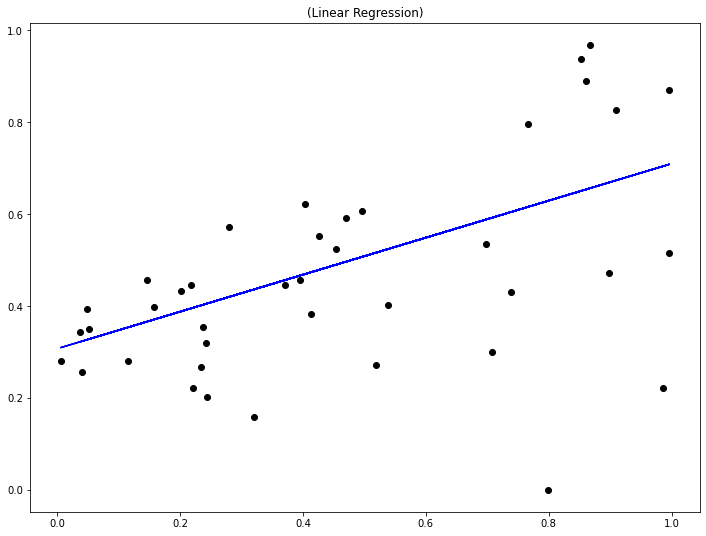

RMSE : 0.16038882495584206 R2_SCORE:  0.35671845263128477


In [31]:
X = df_norm.iloc[:, 2:3].values
Y = df_norm['Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

def linear():
    plt.scatter(X_test, Y_test, color='black')
    plt.plot(X_test, lin_reg.predict(X_test), color='blue')
    plt.title('(Linear Regression)')
    plt.show()
    return
linear()

y_train_predict = lin_reg.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train,y_train_predict)))
r2=r2_score(Y_train,y_train_predict)
print('RMSE :',rmse,'R2_SCORE: ',r2)

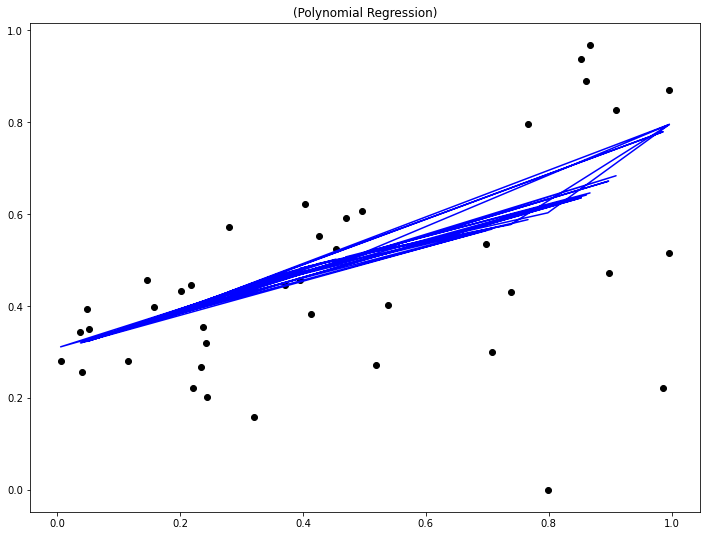

RMSE : 0.15914568630686315 R2_SCORE:  0.3666516764712209


In [32]:
degree=4
poly_reg = PolynomialFeatures(degree)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y_train)

def polymonial():
    plt.scatter(X_test, Y_test, color='black')
    plt.plot(X_test, pol_reg.predict(poly_reg.fit_transform(X_test)), color='blue')
    plt.title('(Polynomial Regression)')
    plt.show()
    return
polymonial()

y_train_predict1 = pol_reg.predict(X_poly)
rmse1=(np.sqrt(mean_squared_error(Y_train,y_train_predict1)))
r2_1=r2_score(Y_train,y_train_predict1)
print('RMSE :',rmse1,'R2_SCORE: ',r2_1)

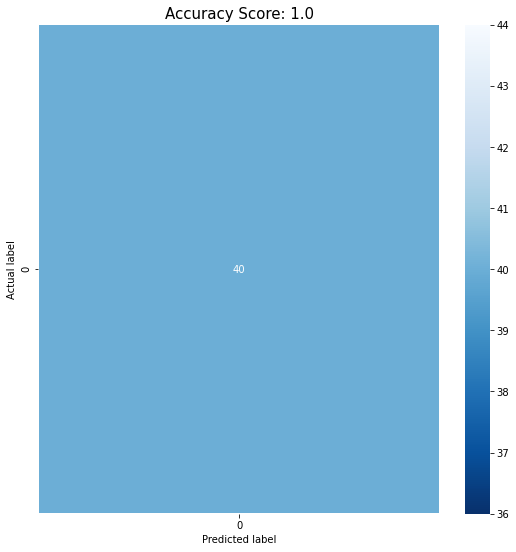

In [89]:
X = pd.DataFrame(np.c_[df_norm['TV']],columns=['TV'])
Y1 = df_norm.iloc[:,1].values
Y = Y1.reshape(200)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train.astype(int))
model.predict(X_test[0:10])

p_model = model.predict(X_test)
score = model.score(X_test, Y_test.astype(int))
cm = metrics.confusion_matrix(Y_test.astype(int), p_model)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [20]:
lin_reg.predict([[1]])

array([0.52916566])

In [19]:
pol_reg.predict(poly_reg.fit_transform([[1]]))

array([0.58674402])

In [90]:
model.predict([[1]])

array([0])